In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
po=pd.read_csv("FinalDATA.csv")
po=po.dropna().reset_index(drop=True)
po=po.drop("Unnamed: 0",axis=1)
po

,Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB) (4...",9799,Galaxy F13,Nightsky Green,2.0,1.0,16.76,2600640.0,12.0,8.0,...,1.0,1.0,6000.0,207.0,1.0,4.4,3.7,4.2,4.0,4.0
1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB) (4...",9799,Galaxy F13,Sunrise Copper,2.0,1.0,16.76,2600640.0,12.0,8.0,...,1.0,1.0,6000.0,207.0,1.0,4.4,3.7,4.2,4.0,4.0
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) (4...",9799,Galaxy F13,Waterfall Blue,2.0,1.0,16.76,2600640.0,12.0,8.0,...,1.0,1.0,6000.0,207.0,1.0,4.4,3.7,4.2,4.0,4.0
3,"REDMI 10 (Pacific Blue, 64 GB) (4 GB RAM)",9999,10,Pacific Blue,2.0,1.0,17.02,1188000.0,11.0,8.0,...,1.0,1.0,6000.0,203.0,1.0,4.3,3.6,4.1,3.9,3.9
4,"APPLE iPhone 13 (Starlight, 128 GB)",58999,iPhone 13,Starlight,2.0,1.0,15.49,296010.0,25.0,6.0,...,1.0,1.0,6000.0,203.0,1.0,4.7,4.6,4.4,4.7,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)...",21962,iPhone 13,(PRODUCT)RED,2.0,1.0,15.49,296010.0,25.0,6.0,...,1.0,1.0,5000.0,188.0,1.0,4.3,4.1,4.1,4.2,4.1
183,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB) ...",14490,iPhone 13,(PRODUCT)RED,2.0,1.0,15.49,296010.0,25.0,6.0,...,1.0,1.0,5000.0,188.0,1.0,4.2,3.7,4.4,3.9,3.7
184,"vivo T1X (Gravity Black, 128 GB) (6 GB RAM)",14999,iPhone 13,(PRODUCT)RED,2.0,1.0,15.49,296010.0,25.0,6.0,...,1.0,1.0,5000.0,188.0,1.0,4.4,4.0,4.2,4.2,4.2
185,"vivo T1X (Space Blue, 128 GB) (4 GB RAM)",12999,iPhone 13,(PRODUCT)RED,2.0,1.0,15.49,296010.0,25.0,6.0,...,1.0,1.0,5000.0,188.0,1.0,4.5,4.0,4.3,4.2,4.3


In [3]:
# Split into X/y
X = po.drop("Price", axis=1)
y = po["Price"]

In [4]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Name", "Color", "Model Name"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
X= transformer.fit_transform(X)
X

<187x337 sparse matrix of type '<class 'numpy.float64'>'
	with 5456 stored elements in Compressed Sparse Row format>

In [5]:
##Fit the model to the training data
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
model.score(X_test, y_test)

0.927696685464702

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestRegressor(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.927696685464702

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.5263157894736842

In [10]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)##random forest calssifier is not giving better result

0.5263157894736842

In [57]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
y_pred_all = model.predict(X)

In [12]:
print(f"Accuracy for test data is: {r2_score(y_test, y_pred)*100}")

Accuracy for test data is: 92.7696685464702


In [13]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)##avd error in prediction
mae = mean_absolute_error(y_test, y_preds)
mae

1907.468947368421

In [16]:
##all of the work till now in single flow

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)



# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
model.score(X_test, y_test)
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)*100}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 92.7696685464702
MAE: 1907.468947368421
MSE: 14900721.796810526


In [19]:
clf = RandomForestRegressor()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200],
        "max_depth": [None, 5, 30],
        "max_features": [ "sqrt"],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 2]}

np.random.seed(42)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=100, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

C:\Users\rushi\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\rushi\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=100,
                   param_distributions={'max_depth': [None, 5, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [10, 100, 200]},
                   verbose=2)

In [21]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [26]:
clf = RandomForestClassifier(n_estimators= 100,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 30,
   n_jobs=2  )
rs_clf.score(X_test,y_test)#cant find the most probable parameters but we can imporve our model if we give some more values

0.5

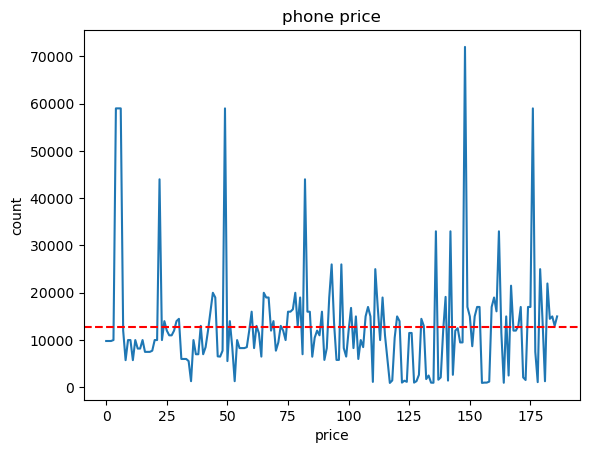

In [65]:

x =po["Price"]

fig, ax = plt.subplots()
ax.plot(x)
plt.title('phone price')
plt.xlabel('price')
plt.ylabel('count')

# Add a meanline
ax.axhline(po["Price"].mean(),
           color='r',
           linestyle="--")

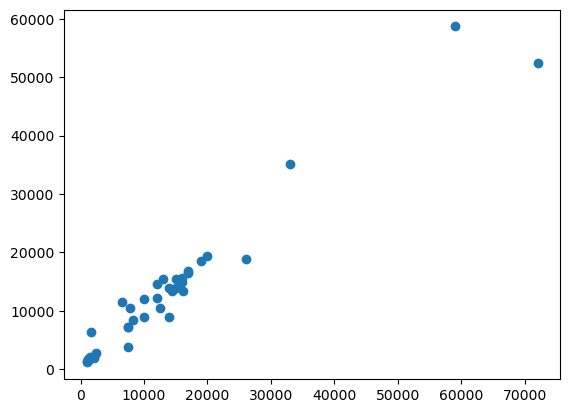

In [30]:
plt.scatter(y_test,y_preds)

<function matplotlib.pyplot.show(close=None, block=None)>

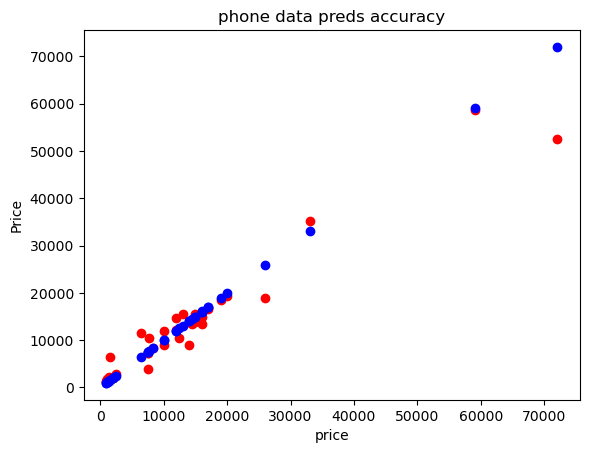

In [64]:
y2=y_test
y1=y_preds
x=y_test
plt.scatter(x, y1, color='red')
plt.scatter(x, y2, color='blue')
plt.title('phone data preds accuracy')
plt.xlabel('price')
plt.ylabel('Price')

plt.show
#blue color is real value and red is predicted value of phone

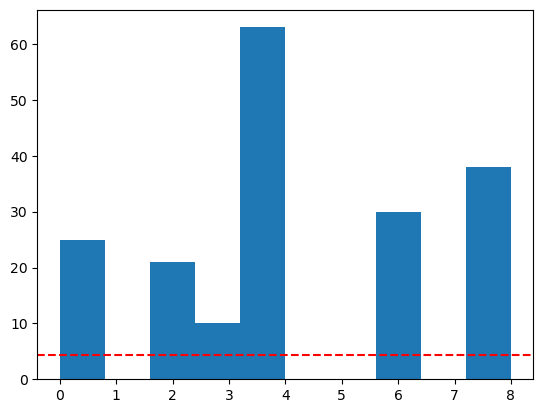

In [46]:
x =po["RAM"]

fig, ax = plt.subplots()
ax.hist(x)

# Add a meanline
ax.axhline(po["RAM"].mean(),
           color='r',
           linestyle="--")

In [42]:
po.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        187 non-null    object 
 1   Price                       187 non-null    int64  
 2   Model Name                  187 non-null    object 
 3   Color                       187 non-null    object 
 4   SIM Type                    187 non-null    float64
 5   Touchscreen                 187 non-null    float64
 6   Display Size                187 non-null    float64
 7   Resolution                  187 non-null    float64
 8   Operating System            187 non-null    float64
 9   Processor Core              187 non-null    float64
 10  Primary Clock Speed         187 non-null    float64
 11  Internal Storage            187 non-null    float64
 12  RAM                         187 non-null    float64
 13  Primary Camera Available    187 non

In [50]:
po.describe()

,Price,SIM Type,Touchscreen,Display Size,Resolution,Operating System,Processor Core,Primary Clock Speed,Internal Storage,RAM,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
count,187.000000,187.000000,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.0,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,12852.299465,1.989305,0.860963,14.930053,1.401111e+06,14.244385,7.262032,1.963712,82.482723,4.320966,...,1.0,0.914439,4663.529412,178.694973,1.000000,4.258824,3.382888,3.836898,3.803209,3.862567
std,11422.518379,0.146254,0.346914,3.944211,1.038659e+06,6.758754,1.440879,0.743361,49.528763,2.542721,...,0.0,0.280466,1478.194319,32.547291,0.103695,0.180694,0.892035,0.893150,0.905830,0.906897
min,932.000000,1.000000,0.000000,4.500000,2.048000e+04,0.000000,1.000000,0.000010,0.000000,0.000320,...,1.0,0.000000,400.000000,51.000000,0.000000,3.800000,0.000000,0.000000,0.000000,0.000000
25%,6999.000000,2.000000,1.000000,15.490000,2.960100e+05,11.000000,6.000000,2.000000,64.000000,3.000000,...,1.0,1.000000,5000.000000,179.500000,1.000000,4.200000,3.200000,3.900000,3.800000,3.900000
50%,10999.000000,2.000000,1.000000,16.590000,1.152000e+06,12.000000,8.000000,2.200000,64.000000,4.000000,...,1.0,1.000000,5000.000000,187.000000,1.000000,4.200000,3.600000,4.100000,4.000000,4.000000
75%,15494.500000,2.000000,1.000000,16.760000,2.592000e+06,22.500000,8.000000,2.400000,128.000000,6.000000,...,1.0,1.000000,5000.000000,192.000000,1.000000,4.400000,3.900000,4.200000,4.200000,4.200000
max,71999.000000,3.000000,1.000000,17.320000,2.656800e+06,26.000000,8.000000,2.800000,256.000000,8.000000,...,1.0,1.000000,6000.000000,220.000000,2.000000,4.800000,4.600000,4.400000,4.700000,4.700000


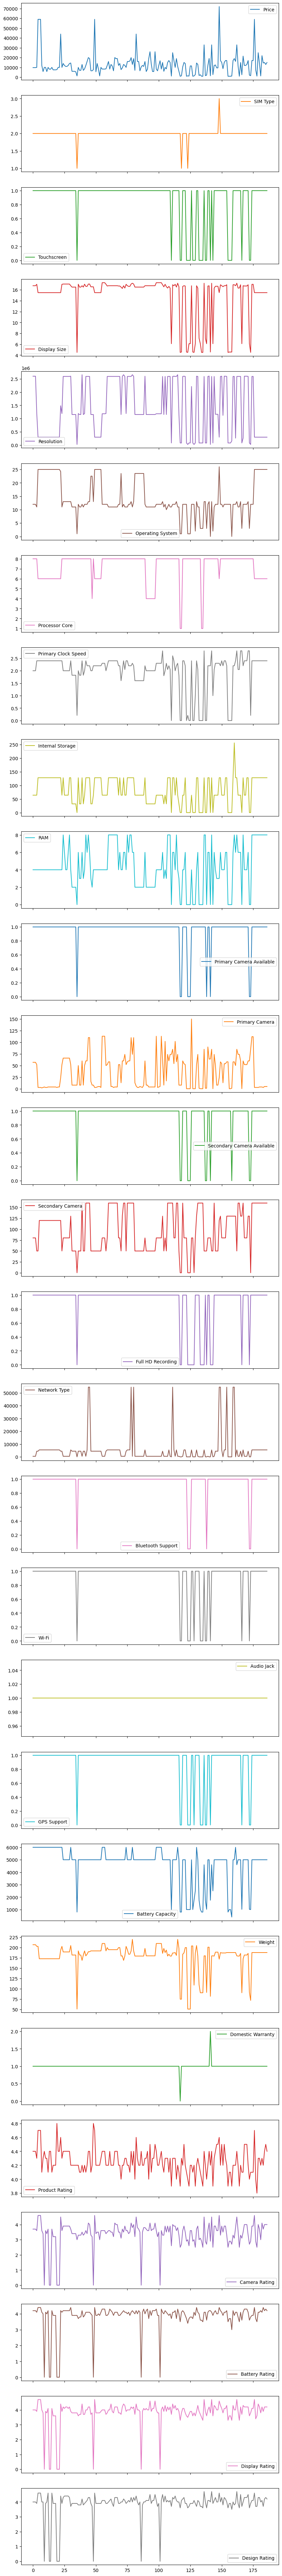

In [55]:
po.plot(figsize=(10, 100), subplots=True);

<function matplotlib.pyplot.show(close=None, block=None)>

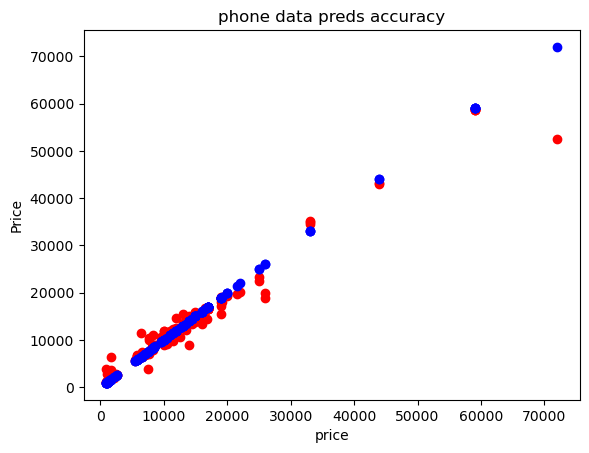

In [63]:
y2=y
y1=y_pred_all
x=y
plt.scatter(x, y1, color='red')
plt.scatter(x, y2, color='blue')
plt.title('phone data preds accuracy')
plt.xlabel('price')
plt.ylabel('Price')

plt.show

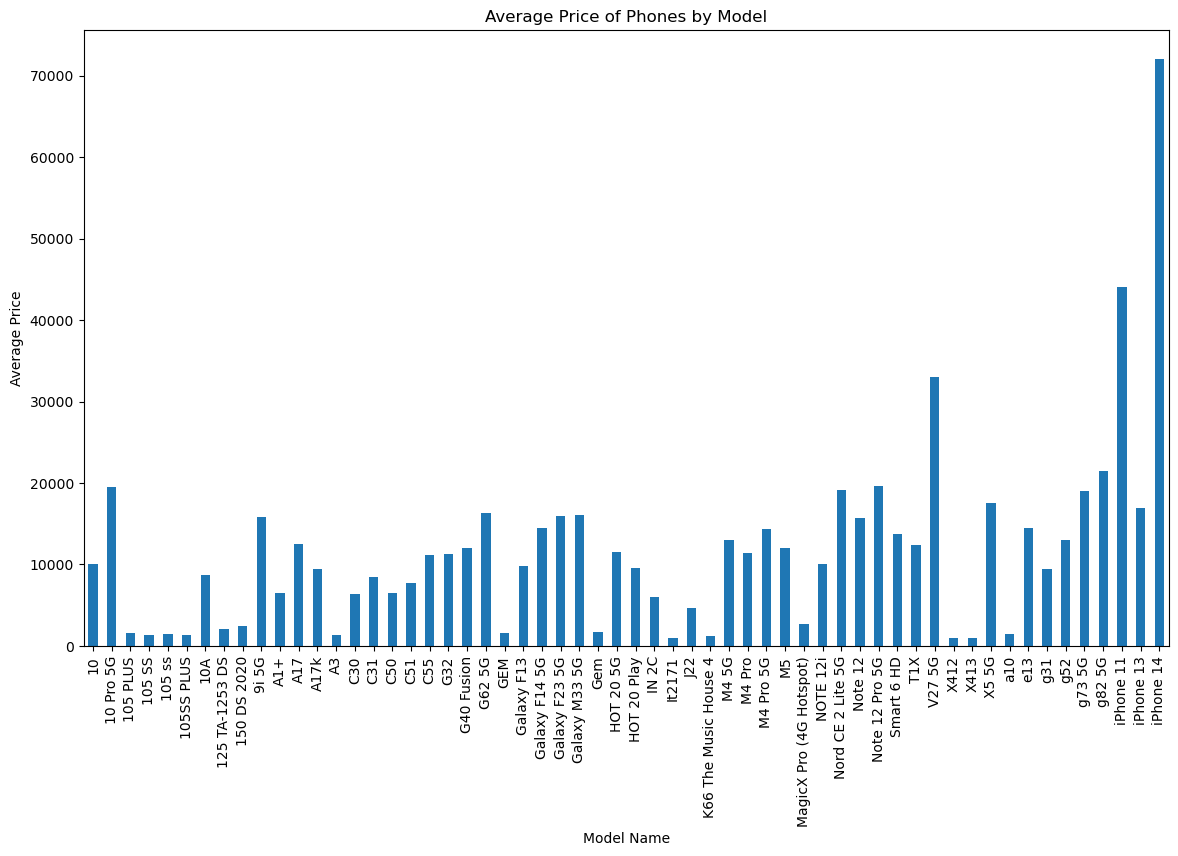

In [67]:
avg_price_by_model = po.groupby('Model Name')['Price'].mean()
plt.figure(figsize=(14, 8))
avg_price_by_model.plot(kind='bar')

plt.title('Average Price of Phones by Model')

plt.xlabel('Model Name')

plt.ylabel('Average Price')

plt.xticks(rotation=90)


plt.show()